In [6]:
"""
笛卡尔坐标下球体磁力正演
--------------------------------------------------------------------

`geoist.gravity`模块有许多重磁力正演程序有
展示如何基于笛卡尔坐标系建立球体并获得球体引起的磁异常及3分量

"""
import matplotlib.pyplot as plt
import numpy as np

from geoist.pfm import sphere, giutils
from geoist import gridder
from geoist.inversion import geometry
from geoist.vis import giplt

In [2]:
# 通过geoist.gridder创建几何对象
# 每个模型元素都有一个属性字典
# 模型数据：创建两个具有不同磁化矢量的球体
# giutils.ang2vec转化磁化强度、磁倾角、磁偏角为3分量向量
model = [
    geometry.Sphere(x=10e3, y=10e3, z=2e3, radius=1.5e3,
                  props={'magnetization': giutils.ang2vec(1, inc=50, dec=-30)}),
    geometry.Sphere(x=20e3, y=20e3, z=2e3, radius=1.5e3,
                  props={'magnetization': giutils.ang2vec(1, inc=-70, dec=30)})]

# 设置磁倾角、磁偏角
inc, dec = -10, 13
# 观测数据：恒定高度，规则网格
shape = (300, 300)
area = [0, 30e3, 0, 30e3]
x, y, z = gridder.regular(area, shape, z=-10)

In [3]:
#计算磁力及3分量
fields = [
    ['Total field Anomaly (nt)', sphere.tf(x, y, z, model, inc, dec)],
    ['Bx (nT)', sphere.bx(x, y, z, model)],
    ['By (nT)', sphere.by(x, y, z, model)],
    ['Bz (nT)', sphere.bz(x, y, z, model)],
]

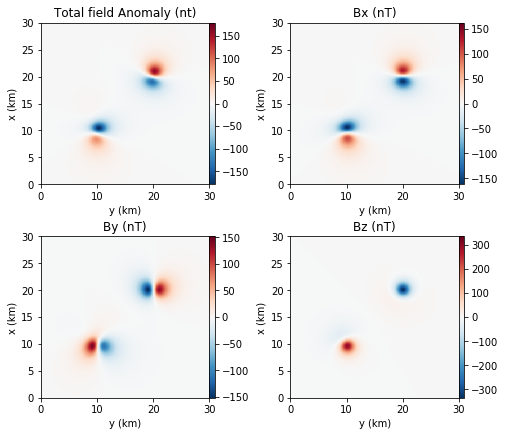

In [7]:
# 画图
fig = plt.figure(figsize=(7, 6))
plt.rcParams['font.size'] = 10
X, Y = x.reshape(shape)/1000, y.reshape(shape)/1000
for i, tmp in enumerate(fields):
    ax = plt.subplot(2, 2, i + 1)
    field, data = tmp
    scale = np.abs([data.min(), data.max()]).max()
    ax.set_title(field)
    plot = ax.pcolormesh(Y, X, data.reshape(shape), cmap='RdBu_r',
                         vmin=-scale, vmax=scale)
    plt.colorbar(plot, ax=ax, aspect=30, pad=0)
    ax.set_xlabel('y (km)')
    ax.set_ylabel('x (km)')
plt.tight_layout(pad=0.5)
plt.show()